# Overlay of the Koshino model bands on the CSC model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [2]:
ROOT = '/Users/jonathanlu/Documents'
MAT = 'tvMoS2'
KMAT = 'MoS2'
THETA = 0.75
REL_PATH = f'{ROOT}/{MAT}/bands/t{THETA}'
DREL_PATH = f'{ROOT}/{MAT}/dos/t{THETA}'

In [3]:
k_mags_path = f'{REL_PATH}/kmags.npy'
evals_path = f'{DREL_PATH}/evals.npy'
dos_path = f'{DREL_PATH}/dos.npy'
kosh_path = f'{ROOT}/koshino/{KMAT}/band_koshino_{THETA}.npz'
kosh_dos_path = f'{ROOT}/koshino/{KMAT}/dos_koshino_{THETA}.npz'

In [4]:
k_mags = np.load(k_mags_path)
evals = np.sort(np.load(evals_path), axis=1) + 0.5
signs = -1*(evals < -5e-1) + 1*(evals >= -5e-1)
modes = np.sqrt(np.abs(evals)) * signs - np.sqrt(0.5)
nmodes = evals.shape[1]
kosh_modes = np.load(kosh_path)
kosh_nmodes = kosh_modes.shape[1]
kosh_mags = np.linspace(k_mags[0], k_mags[-1], len(kosh_modes))
kosh_dos = np.load(kosh_dos_path)

dos = np.load(dos_path)

In [5]:
SCALE = 2.3
adjusted_kosh_modes = SCALE * kosh_modes
min_mode, max_mode = np.min(modes), np.max(modes)
kosh_min_mode, kosh_max_mode = np.min(adjusted_kosh_modes), np.max(adjusted_kosh_modes)
ndos = len(dos)
omegas = np.linspace(min_mode, max_mode, ndos)
kosh_omegas = np.linspace(kosh_min_mode, kosh_max_mode, ndos)

adjusted_kosh_dos = SCALE * kosh_dos * 1000
np.max(adjusted_kosh_dos)

168473.65238399548

<Figure size 432x288 with 0 Axes>

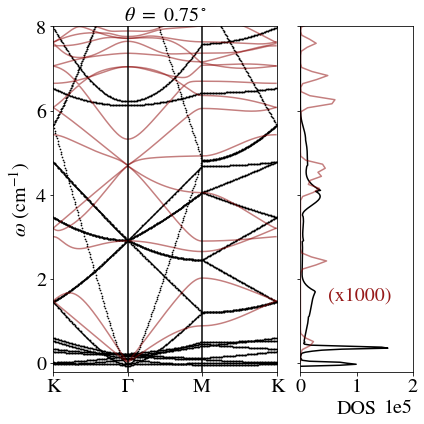

In [9]:
# Plot the CSC modes above the Koshino modes 
FACTOR = 20

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
FONT_SIZE = 20
SMALL_SIZE = 14
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)

delta = np.min(omegas/FACTOR) - np.min(modes)
plt.clf()
fig, [axband, axdos] = plt.subplots(nrows=1, ncols=2, 
                                    sharey=True, figsize=(6,6),
                                    gridspec_kw={'width_ratios': [3, 1.5]})
plt.ylim(bottom=-0.2, top=8)

axdos.plot(dos, omegas/FACTOR - delta, c='black', label='CSC')
axdos.plot(adjusted_kosh_dos, kosh_omegas, c='darkred', alpha=0.5, label='EC')
axdos.ticklabel_format(axis='x', style='sci', scilimits=(5,6))
axdos.set_xlim(0, 2e5)
axdos.set_xlabel("DOS", fontsize=FONT_SIZE)
axdos.xaxis.set_major_locator(MaxNLocator(2))
# axdos.legend(loc='lower right')

axband.set_title(rf"$\theta$ $=$ {THETA}$^\circ$", fontsize=FONT_SIZE)
for i in range(len(evals)):
    axband.scatter([i]*len(modes[i]), modes[i], c='black', s=0.5)
# axband.plot(modes, c='black')
axband.plot(adjusted_kosh_modes, c='darkred', alpha=0.5)
axband.set_xlim(left=0, right=301)
axband.set_xticks([0,100,200,301])
axband.plot([100]*2, axband.get_ylim(), c='k')
axband.plot([200]*2, axband.get_ylim(), c='k')
axband.set_xticklabels(['K', r'$\Gamma$', 'M', 'K'])
axband.set_ylabel(r'$\omega$ (cm$^{-1}$)', fontsize=FONT_SIZE)
axdos.text(5e4, 1.5, '(x1000)', fontsize=FONT_SIZE, c='darkred', alpha=0.9)

plt.tight_layout()
plt.savefig(f"{ROOT}/data_mlph/overlay_{THETA}.pdf")
plt.show()

-0.07506593662390815

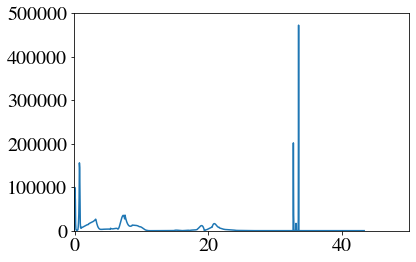

In [7]:

plt.plot(omegas/11 - delta, dos)
plt.xlim(left=np.min(modes), right=50)
plt.ylim(0, 5e5)
np.min(modes)